In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings("ignore")

In [4]:
from xgboost import XGBClassifier

In [5]:
%matplotlib inline

In [128]:
nira = pd.read_csv('customers (1).csv')

In [129]:
nira.shape

(10000, 15)

In [130]:
nira.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Reason for exiting company
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,High Service Charges/Rate of Interest
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Nil
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Long Response Times
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Nil
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Nil


In [131]:
#Drop Uniqiue id and test columns
nira.drop(['RowNumber',"CustomerId"],axis=1, inplace=True)

In [132]:
# Check columns type
nira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Surname                       10000 non-null object
CreditScore                   10000 non-null int64
Geography                     10000 non-null object
Gender                        10000 non-null object
Age                           10000 non-null int64
Tenure                        10000 non-null int64
Balance                       10000 non-null float64
NumOfProducts                 10000 non-null int64
HasCrCard                     10000 non-null int64
IsActiveMember                10000 non-null int64
EstimatedSalary               10000 non-null float64
Exited                        10000 non-null int64
Reason for exiting company    10000 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.7+ KB


In [133]:
nira.columns.values

array(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Reason for exiting company'],
      dtype=object)

In [134]:
# Check unique column values

# for i in nira.columns.values:
#     print(i,'\t',len(nira[i].unique()))
nira.nunique()

Surname                       2932
CreditScore                    460
Geography                        3
Gender                           2
Age                             70
Tenure                          11
Balance                       6382
NumOfProducts                    4
HasCrCard                        2
IsActiveMember                   2
EstimatedSalary               9999
Exited                           2
Reason for exiting company       5
dtype: int64

In [135]:
#Check for missing/null values
print(nira.isnull().values.any())
print(nira.isna().sum())

False
Surname                       0
CreditScore                   0
Geography                     0
Gender                        0
Age                           0
Tenure                        0
Balance                       0
NumOfProducts                 0
HasCrCard                     0
IsActiveMember                0
EstimatedSalary               0
Exited                        0
Reason for exiting company    0
dtype: int64


In [77]:
nira.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Unique columns values

In [78]:
print('tenure\t\t', nira['Tenure'].unique())
print('Geography\t', nira['Geography'].unique())
print('NumOfProducts\t', nira['NumOfProducts'].unique())

tenure		 [ 2  1  8  7  4  6  3 10  5  9  0]
Geography	 ['France' 'Spain' 'Germany']
NumOfProducts	 [1 3 2 4]


In [79]:
nira['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [80]:
nira['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [81]:
nira[nira['HasCrCard']==1]['Exited'].value_counts()

0    5631
1    1424
Name: Exited, dtype: int64

In [82]:
nira[nira['HasCrCard']==0]['Exited'].value_counts()

0    2332
1     613
Name: Exited, dtype: int64

In [83]:
nira['Reason for exiting company'].value_counts()

Nil                                            7963
Long Response Times                             537
Inexperienced Staff / Bad customer service      507
Excess Documents Required                       503
High Service Charges/Rate of Interest           490
Name: Reason for exiting company, dtype: int64

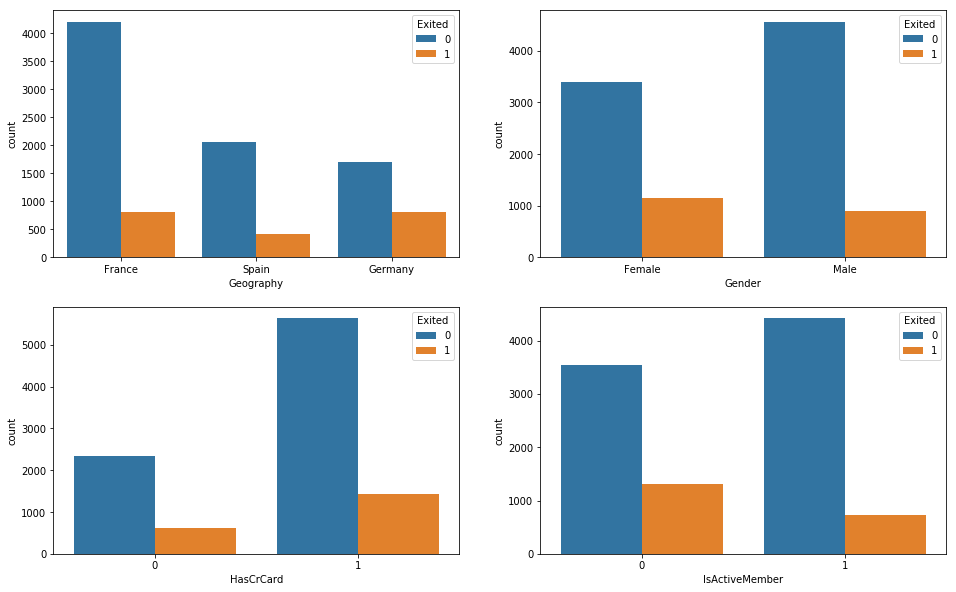

In [84]:
# Behavior of Exited customers for various categorical features
fig, axarr = plt.subplots(2,2, figsize=(16,10))
# plt.figure(figsize=(15,5))
sns.countplot(x='Geography', hue = 'Exited',data = nira, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = nira, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = nira, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = nira, ax=axarr[1][1])


From above plots we can infer that:
    1. Germany has higher churn ratio than Spain and France.
    2. Females churners are more as compared to male.
    3. Proportion of customers having credit cards is higher than non-credit card holders.
    4. Inactive member have higher risk to churn.

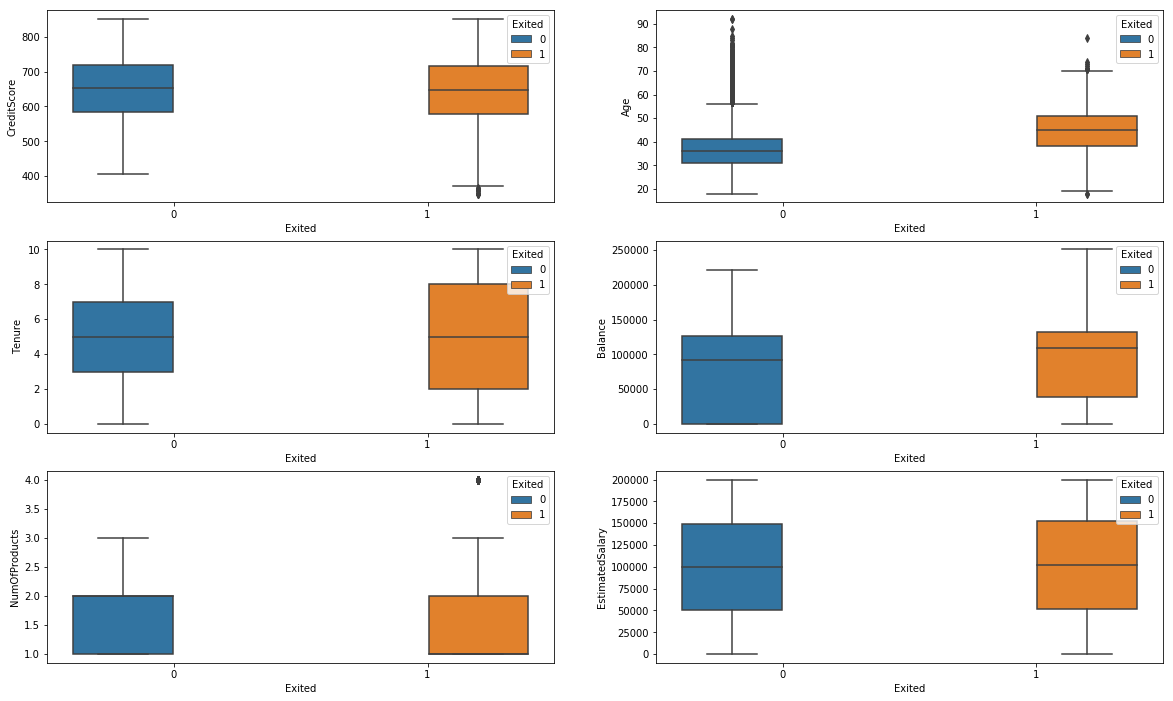

In [85]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = nira, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = nira , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = nira, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = nira, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = nira, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = nira, ax=axarr[2][1])

Inferences:
    1. There is no significant contribution of CreditScore,NumOfProducts and EstimatedSalary in retained and churned customers.
    2. Aged customers show more tendency to churn.
    3. Average tenure customers as safe players. low and hight tenure products are more likely to churn.
    4. The bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

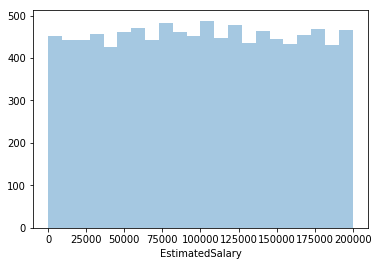

In [86]:
sns.distplot(nira.EstimatedSalary,kde=False)

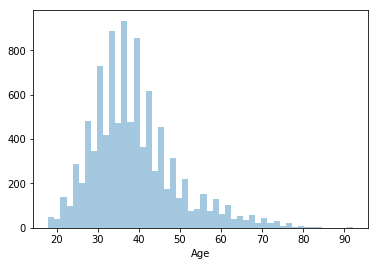

In [87]:
sns.distplot(nira.Age,kde=False)

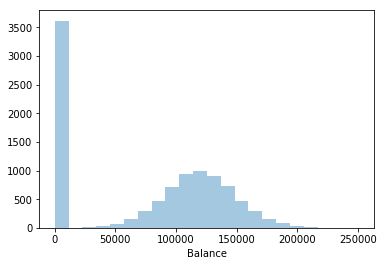

In [88]:
sns.distplot(nira.Balance,kde=False)

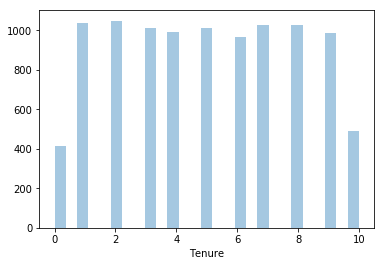

In [89]:
sns.distplot(nira.Tenure,kde=False)

In [90]:
len(nira[nira['Exited']==1]['Surname'].unique())

1188

# Data Preprocessing

In [91]:
# lb = LabelEncoder()
# nira['Geography'] = lb.fit_transform(nira['Geography'])
# Need not to encode reasons as its available only for exited customers and does not contribute towards churn.
# nira['Reason for exiting company'] = lb.fit_transform(nira['Reason for exiting company'])
# nira['Gender'] = lb.fit_transform(nira['Gender'])
# nira['Surname'] = lb.fit_transform(nira['Surname'])

In [92]:
# nira.head()

In [136]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()

for i in lst:

    if (nira[i].dtype == np.str or nira[i].dtype == np.object):
        for j in nira[i].unique():
            nira[i+'_'+j] = np.where(nira[i] == j,1,-1)
        remove.append(i)
nira = nira.drop(remove, axis=1)
nira.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Reason for exiting company,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,High Service Charges/Rate of Interest,1,-1,-1,1,-1
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,Nil,-1,1,-1,1,-1
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,Long Response Times,1,-1,-1,1,-1
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,Nil,1,-1,-1,1,-1
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,Nil,-1,1,-1,1,-1


In [137]:
# nira.columns

# Feature Engineering

Since we don't have prior history or bank statements. so we should create another feature with balance given.

In [138]:
#Create a new feature Balance to salary ratio.
nira['BalToSalRatio'] = nira['Balance']/nira['EstimatedSalary']

In [139]:
nira['TenureByAge'] = nira.Tenure/(nira.Age - 18)
nira['CreditScoreGivenAge'] = nira.CreditScore/(nira.Age - 18)
nira.loc[nira.HasCrCard == 0, 'HasCrCard'] = -1
nira.loc[nira.IsActiveMember == 0, 'IsActiveMember'] = -1

In [140]:
nira.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Reason for exiting company', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Female', 'Gender_Male', 'BalToSalRatio',
       'TenureByAge', 'CreditScoreGivenAge'],
      dtype='object')

In [141]:
features= [i for i in nira.columns if i not in ['Surname','Reason for exiting company','Exited']]
target = 'Exited'

In [142]:
print(features)
nira[features].tail()

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Spain', 'Geography_Germany', 'Gender_Female', 'Gender_Male', 'BalToSalRatio', 'TenureByAge', 'CreditScoreGivenAge']


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male,BalToSalRatio,TenureByAge,CreditScoreGivenAge
9995,771,39,5,0.00,2,1,-1,96270.64,1,-1,-1,-1,1,0.000000,0.238095,36.714286
9996,516,35,10,57369.61,1,1,1,101699.77,1,-1,-1,-1,1,0.564108,0.588235,30.352941
9997,709,36,7,0.00,1,-1,1,42085.58,1,-1,-1,1,-1,0.000000,0.388889,39.388889
9998,772,42,3,75075.31,2,1,-1,92888.52,-1,-1,1,-1,1,0.808230,0.125000,32.166667
9999,792,28,4,130142.79,1,1,-1,38190.78,1,-1,-1,1,-1,3.407702,0.400000,79.200000


In [143]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalToSalRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember', 'Geography_France', 'Geography_Spain',
       'Geography_Germany', 'Gender_Female', 'Gender_Male']
nira = nira[['Exited'] + continuous_vars + cat_vars]
nira.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalToSalRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,101348.88,0.000000,0.083333,25.791667,1,1,1,-1,-1,1,-1
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.043478,26.434783,-1,1,-1,1,-1,1,-1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.333333,20.916667,1,-1,1,-1,-1,1,-1
3,0,699,39,1,0.00,2,93826.63,0.000000,0.047619,33.285714,-1,-1,1,-1,-1,1,-1
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.080000,34.000000,1,1,-1,1,-1,1,-1


In [144]:
# minMax scaling the continuous variables
continousv = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
minVec = nira[continousv].min().copy()
maxVec = nira[continousv].max().copy()
nira[continousv] = (nira[continousv]-minVec)/(maxVec-minVec)
nira.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalToSalRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.000000,0.083333,25.791667,1,1,1,-1,-1,1,-1
1,0,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.744677,0.043478,26.434783,-1,1,-1,1,-1,1,-1
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569654,1.401375,0.333333,20.916667,1,-1,1,-1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.000000,0.047619,33.285714,-1,-1,1,-1,-1,1,-1
4,0,1.000,0.337838,0.2,0.500246,0.000000,0.395400,1.587055,0.080000,34.000000,1,1,-1,1,-1,1,-1


In [145]:
nira[nira==np.inf]=np.nan
nira.fillna(nira.mean(), inplace=True)

In [146]:
#split test and train set
# nira.fillna(0)
# nira.round(2)
X_train, X_test, Y_train, Y_test = train_test_split(nira[features],nira[target], test_size = 0.2, random_state = 0)

In [147]:
print(X_train.shape,Y_train.shape, X_test.shape, Y_test.shape)

(8000, 16) (8000,) (2000, 16) (2000,)


In [148]:
# col_mask=nira.isnull().any(axis=0)
# col_mask
# row_mask=nira.isnull().any(axis=1)
# row_mask
# nira.loc[row_mask,col_mask]

# Build model to predict customer attrition

For the model fitting, I will try out the following

    Logistic regression in the primal space and with different kernels
    SVM in the primal and with different Kernels
    Ensemble models

In [149]:
print(nira.isnull().values.any())
print(nira.isna().sum())
# (np.where(np.isnan(nira)))

False
Exited                 0
CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
EstimatedSalary        0
BalToSalRatio          0
TenureByAge            0
CreditScoreGivenAge    0
HasCrCard              0
IsActiveMember         0
Geography_France       0
Geography_Spain        0
Geography_Germany      0
Gender_Female          0
Gender_Male            0
dtype: int64


In [150]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [43]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(X_train,Y_train)
best_model(log_primal_Grid)
# lr = LogisticRegression()
# lr.fit(X_train,Y_train)


0.8115
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=1e-05, verbose=0, warm_start=False)


In [44]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(X_train,Y_train)
best_model(log_pol2_Grid)

0.811
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [45]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(X_train,Y_train)
best_model(SVM_grid)

0.827125
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [46]:
# # Fit SVM with pol kernel
# param_grid = {'C': [1,10], 'gamma': [0.1,0.01],'probability':[True],'kernel': ['poly'],'degree':[2] }
# SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
# SVM_grid.fit(X_train,Y_train)
# best_model(SVM_grid)

In [47]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6], 'max_features': [2,4,7,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train,Y_train)
best_model(RanFor_grid)

0.860125
{'max_depth': 6, 'max_features': 7, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [45]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train,Y_train)
best_model(xgb_grid)

0.865375
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.001, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [51]:
xgb_grid.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [49]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='warn',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train,Y_train)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=1e-05, verbose=0, warm_start=False)

In [50]:
print(classification_report(Y_train, log_primal.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6368
           1       0.60      0.21      0.31      1632

   micro avg       0.81      0.81      0.81      8000
   macro avg       0.71      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000



In [51]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='warn', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,Y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
print(classification_report(Y_train,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      6368
           1       0.74      0.14      0.23      1632

   micro avg       0.81      0.81      0.81      8000
   macro avg       0.78      0.56      0.56      8000
weighted avg       0.80      0.81      0.76      8000



In [53]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
print(classification_report(Y_train,  SVM_RBF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6368
           1       0.94      0.79      0.86      1632

   micro avg       0.95      0.95      0.95      8000
   macro avg       0.95      0.89      0.91      8000
weighted avg       0.95      0.95      0.95      8000



In [55]:
# # Fit SVM with Pol Kernel
# SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
#               probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
# SVM_POL.fit(X_train,Y_train)

In [56]:
# print(classification_report(Y_train,  SVM_POL.predict(X_train)))

In [57]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
print(classification_report(Y_train,  RF.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6368
           1       0.88      0.52      0.65      1632

   micro avg       0.89      0.89      0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.88      8000



In [151]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=5, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [156]:
print(classification_report(Y_train,  XGB.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6368
           1       0.83      0.52      0.64      1632

   micro avg       0.88      0.88      0.88      8000
   macro avg       0.86      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



# Feature Importances

In [157]:
XGB.feature_importances_

array([0.0140168 , 0.23042038, 0.0196243 , 0.03713082, 0.27057955,
       0.03053795, 0.13304946, 0.01968599, 0.03193655, 0.0251689 ,
       0.0861406 , 0.0201156 , 0.        , 0.04052991, 0.01777884,
       0.02328438], dtype=float32)

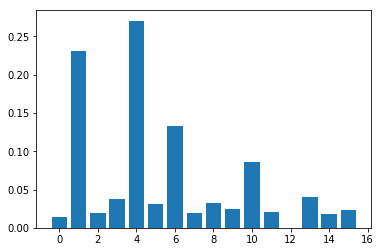

In [158]:
from xgboost import plot_importance
plt.bar(range(len(XGB.feature_importances_)), XGB.feature_importances_)
plt.show()

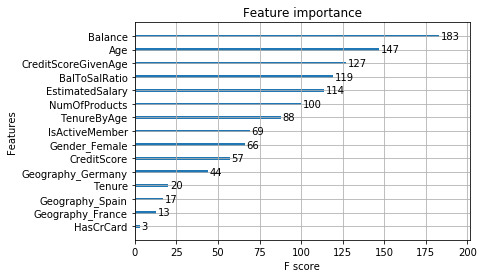

In [159]:
plot_importance(XGB)
plt.show()

In [61]:
y = Y_train
X = X_train
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
# auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

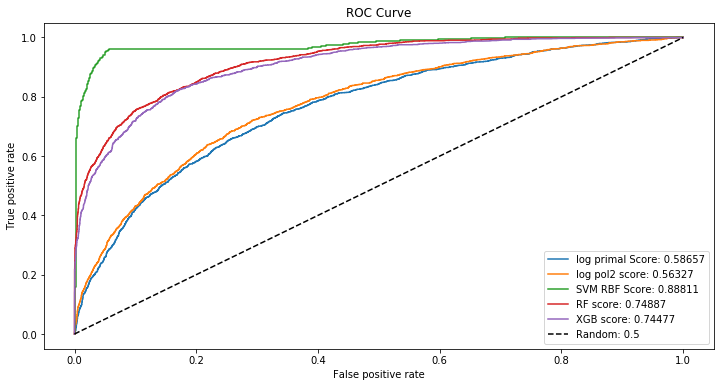

In [62]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
# plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# Conclusions

1. Using Bagging Random forest classifier gives best results with best score of 88%.
2. Balance, Age, CreditScoreGivenAge, BalToSalRatio, NumberOfProducts, TenureByAge are the top contributers to predict customer attrition.